# EDA sencillo Actividad 3 y 4

Vamos a usar un dataset sencillo de kaggle para hacer un pequeño análisis exploratorio y aplicar algunas técnicas de preprocesamiento, transformación, algoritmos de ML y visualización. Dicho dataset es el que se puede obtener en éste enlace <https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression>. Se trata de un dataset que indica una relación entre años de experiencia trabajando y salario de un grupo de personas.

In [1]:
# Importamos las librerías necesarias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Empecemos con una primera toma de contacto de los datos

In [2]:
# Asigno los datos a un dataframe

df = pd.read_csv('./Salary_Data.csv')
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Estudiamos la composición de filas y columnas del dataset.

Estudiemos el significado de las columnas y el número de datos que tenemos.

In [3]:
df.shape # (filas, columnas)

(30, 2)

Vemos que tenemos 30 filas y 2 columnas.

In [4]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

Vemos que las dos columnas que tenemos son:

* *YearsExperience*: Indican los años que lleva trabajando.
* *Salary*: Indica el salario que tiene la persona.

Veamos los valores estadísticos de la variable que queremos predecir: el salario.

In [5]:
# Resumen de estadística descriptiva:

df['Salary'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

Veamos como se distribuyen los datos:

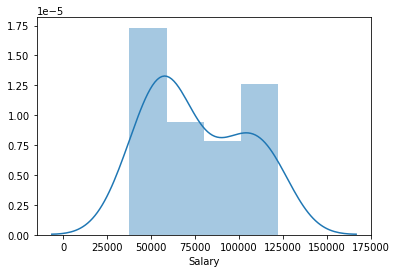

In [6]:
# Histograma:

sns.distplot(df['Salary']);

### Valores perdidos y outlier

Comprobamos los valores nulos en el dataset:

In [7]:
df.isnull().sum().sort_values(ascending=False)

Salary             0
YearsExperience    0
dtype: int64

Vemos que no hay valores nulos en el dataset.

Veamos como se distribuyen los datos en relación a las dos variables:

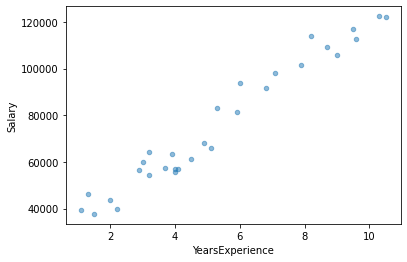

In [8]:
datos = pd.concat([df['Salary'], df['YearsExperience']], axis=1)
datos.plot.scatter(x='YearsExperience', y='Salary', alpha = 0.5);

Parece a simple vista que no tenemos datos outlier. Además podemos ver que existe una relación lineal entre las dos variables.

### Aplicamos una regresión logística

In [9]:
# Obtenemos las columnas por separado
X = df.iloc[:,:-1].values # Años de experiencia (conjunto de datos)
y = df.iloc[:,1:2].values # Salario (etiquetas)
# Separamos los datos en conjunto de entrenamiento (80 %) y de test (20 %)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
# Entrenamos la regresión
regressor = LinearRegression()
regressor.fit(X_train,y_train)
# Predecimos los datos de test
y_pred=regressor.predict(X_test)
y_pred


array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

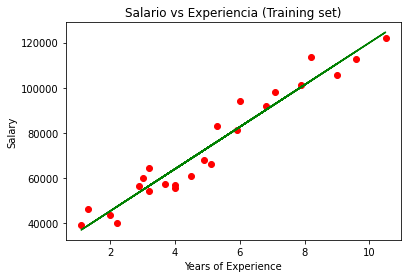

In [10]:
# Visualizamos la regresión obtenida con los datos de entrenamiento
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Salario vs Experiencia (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

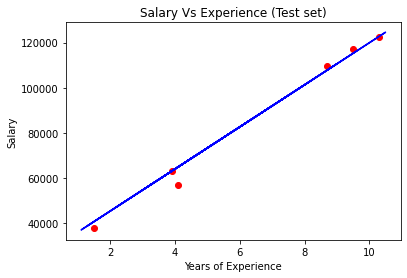

In [11]:
# Visualizamos la regresión obtenida con los datos de test
plt.scatter(X_test, y_test,color ='red')
plt.plot(X_train, regressor.predict(X_train),color = 'blue')
plt.title('Salary Vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Así hemos completado un pequeño ejemplo de un dataset y hemos comprendido que existe una relación lineal entre los datos ya que vemos que se ajusta de forma correcta la regresión obtenida con los datos.